# 1. **Install** pyARC

In [1]:
# Install pyARC (Ignore dependencies to avoid conflicts)
!pip install --no-deps pyARC

## **2. Load and preprocess the dataset**

In [2]:
import pandas as pd

# # Upload CSV file manually in Google Colab
from google.colab import files

uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Read CSV file into a DataFrame
df = pd.read_csv(file_name)




Saving basket_analysis.csv to basket_analysis (3).csv


In [3]:
# Display first few rows to inspect the data
print("Original Data:")
df.head()

Original Data:


,Id,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Get the total number of rows and columns
num_rows, num_columns = df.shape

print(f"Total Rows: {num_rows}")
print(f"Total Columns: {num_columns}")


Total Rows: 999
Total Columns: 17


In [5]:
# Drop unnecessary columns (e.g., 'Id' if not needed)
df.drop(columns=['Id'], inplace=True)

In [6]:
# Check for missing values and fill/drop if necessary
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64


In [7]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Number of duplicate rows: 79


In [8]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [9]:
# After removing duplicates total number of rows and columns
num_rows, num_columns = df.shape

print(f"Total Rows: {num_rows}")
print(f"Total Columns: {num_columns}")


Total Rows: 920
Total Columns: 16


In [10]:
# Count unique transactions (number of rows)
unique_transactions = df.shape[0]

# Count unique products across all transactions
unique_products = pd.unique(df.iloc[:, 1:].values.ravel())  # Assuming products are in multiple columns
unique_products_count = len(unique_products[~pd.isna(unique_products)])  # Remove NaNs before counting

print(f"🔹 Unique Transactions: {unique_transactions}")
print(f"🔹 Unique Products: {unique_products_count}")


🔹 Unique Transactions: 920
🔹 Unique Products: 2


In [11]:
# Show cleaned data
print("\nCleaned Data:")
df.head()


Cleaned Data:


,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# **3. Train the CBA model**

In [12]:
!pip install scikit-learn

In [13]:
!pip install pyfim

In [14]:
# Import necessary libraries
from pyarc import CBA
from pyarc.data_structures import TransactionDB

# **4. Extract and display frequent itemsets and association rules**

In [15]:
# Convert dataset into transactional format
transaction_db = TransactionDB.from_DataFrame(df.astype(str), target="chocolate")

# Train the CBA model
cba = CBA(support=0.015, confidence=0.60)  # Adjust thresholds as needed
cba.fit(transaction_db)

# Get association rules
rules = cba.clf.rules

# Display the generated rules
for rule in rules:
    print("\n",rule)



 CAR {Ice cream=False,Sugar=False,Butter=False,Dill=True,Eggs=False,Milk=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 7, id: 28579

 CAR {Bread=False,Ice cream=False,Sugar=False,Butter=False,Dill=True,Milk=False,Unicorn=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, id: 28574

 CAR {Bread=False,Ice cream=False,Corn=False,Sugar=False,Dill=True,Milk=False,Unicorn=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, id: 30596

 CAR {Bread=False,Ice cream=False,Sugar=False,Dill=True,Kidney Beans=False,Milk=False,Unicorn=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, id: 30619

 CAR {Bread=False,Kidney Beans=False,Milk=False,Dill=False,Sugar=True,Apple=False,Yogurt=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, id: 67160

 CAR {Bread=False,Ice cream=False,Sugar=False,Onion=False,Dill=True,Milk=False,Unicorn=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, id: 30637

 CAR {Bread=False,Cheese=True,Kidney Beans=False,Milk=False,Unicorn=False,

In [16]:
print(f"🔹 Number of Rules Learned: {len(cba.clf.rules)}")


🔹 Number of Rules Learned: 292


In [17]:
chocolate_true_rules = [rule for rule in cba.clf.rules if "chocolate=True" in str(rule)]
print(f"🔹 Rules Predicting 'chocolate=True': {len(chocolate_true_rules)} / {len(cba.clf.rules)}")

🔹 Rules Predicting 'chocolate=True': 74 / 292


In [18]:
# Import accuracy_score, confusion_matrix, and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the dataset
y_pred = cba.predict(transaction_db)

# Convert y_pred to the same data type as df["chocolate"]
y_pred = [1 if x == 'True' else 0 for x in y_pred]  # Convert 'True'/'False' to 1/0

accuracy = accuracy_score(df["chocolate"], y_pred)
print(f"🔹 Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(df["chocolate"], y_pred))

# Classification Report
print("\n🔹 Classification Report:")
print(classification_report(df["chocolate"], y_pred))

🔹 Model Accuracy: 0.8457

🔹 Confusion Matrix:
[[488  21]
 [121 290]]

🔹 Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.96      0.87       509
        True       0.93      0.71      0.80       411

    accuracy                           0.85       920
   macro avg       0.87      0.83      0.84       920
weighted avg       0.86      0.85      0.84       920



In [19]:
# Sort rules by confidence and support
sorted_rules = sorted(cba.clf.rules, key=lambda rule: (rule.confidence, rule.support), reverse=True)

print("🔹 Top 10 Strongest Rules (Sorted by Confidence & Support):\n")
for i, rule in enumerate(sorted_rules[:10]):
    print(f" \n {i+1}. {rule}")


🔹 Top 10 Strongest Rules (Sorted by Confidence & Support):

 
 1. CAR {Ice cream=False,Sugar=False,Butter=False,Dill=True,Eggs=False,Milk=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 7, id: 28579
 
 2. CAR {Bread=False,Ice cream=False,Sugar=False,Butter=False,Dill=True,Milk=False,Unicorn=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, id: 28574
 
 3. CAR {Bread=False,Ice cream=False,Corn=False,Sugar=False,Dill=True,Milk=False,Unicorn=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, id: 30596
 
 4. CAR {Bread=False,Ice cream=False,Sugar=False,Dill=True,Kidney Beans=False,Milk=False,Unicorn=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, id: 30619
 
 5. CAR {Bread=False,Kidney Beans=False,Milk=False,Dill=False,Sugar=True,Apple=False,Yogurt=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, id: 67160
 
 6. CAR {Bread=False,Ice cream=False,Sugar=False,Onion=False,Dill=True,Milk=False,Unicorn=False} => {chocolate=False} sup: 0.02 conf: 1.00 len: 8, i

In [28]:
# Extract Association Rules
rules = []
for rule in cba.clf.rules:
    # Ignore rules with empty antecedents
    if len(rule.antecedent) > 0:
        rules.append({
            "Antecedent": set(rule.antecedent),
            "Consequent": set(rule.consequent),
            "Support": round(rule.support, 2),
            "Confidence": round(rule.confidence, 3),
            "Rule Length": len(rule.antecedent),
            "Support-Confidence Weight": round(rule.support * rule.confidence, 2)
        })

# Convert to DataFrame
rules_df = pd.DataFrame(rules)

print(rules_df)

                                            Antecedent          Consequent  \
0    {(Sugar, False), (Ice cream, False), (Butter, ...  {chocolate, False}   
1    {(Bread, False), (Sugar, False), (Ice cream, F...  {chocolate, False}   
2    {(Bread, False), (Corn, False), (Sugar, False)...  {chocolate, False}   
3    {(Bread, False), (Sugar, False), (Ice cream, F...  {chocolate, False}   
4    {(Bread, False), (Apple, False), (Kidney Beans...  {chocolate, False}   
..                                                 ...                 ...   
287  {(Ice cream, False), (Milk, True), (Onion, Fal...   {chocolate, True}   
288  {(Sugar, False), (Cheese, True), (Ice cream, T...  {chocolate, False}   
289  {(Ice cream, False), (Unicorn, True), (Apple, ...   {chocolate, True}   
290  {(Ice cream, False), (Butter, False), (Unicorn...   {chocolate, True}   
291  {(Unicorn, True), (Onion, False), (Sugar, True...  {chocolate, False}   

     Support  Confidence  Rule Length  Support-Confidence Weigh

In [21]:
# Sort Rules Based on  Confidence-Support
conf_sup_sorted = rules_df.sort_values(by=["Confidence", "Support"], ascending=[False, False])


# Display results
print("\n🔹 Sorted by Confidence-Support:")
print(conf_sup_sorted.to_string(index=False))



🔹 Sorted by Confidence-Support:
                                                                                                                                                  Antecedent         Consequent  Support  Confidence  Rule Length  Support-Confidence Weight
                                                           {(Sugar, False), (Ice cream, False), (Butter, False), (Dill, True), (Eggs, False), (Milk, False)} {chocolate, False}     0.02       1.000            6                       0.02
                                        {(Bread, False), (Sugar, False), (Ice cream, False), (Butter, False), (Dill, True), (Milk, False), (Unicorn, False)} {chocolate, False}     0.02       1.000            7                       0.02
                                          {(Bread, False), (Corn, False), (Sugar, False), (Ice cream, False), (Dill, True), (Milk, False), (Unicorn, False)} {chocolate, False}     0.02       1.000            7                       0.02
                   

In [22]:
# Sort Rules Based on Support-Confidence  Metric
sup_conf_sorted = rules_df.sort_values(by=["Support", "Confidence"], ascending=[False, False])

# Display results
print("\n🔹 Sorted by Support-Confidence:")
print(sup_conf_sorted.to_string(index=False))


🔹 Sorted by Support-Confidence:
                                                                                                                                                  Antecedent         Consequent  Support  Confidence  Rule Length  Support-Confidence Weight
                                       {(Bread, False), (Apple, False), (Butter, False), (Milk, False), (Kidney Beans, False), (Sugar, True), (Dill, False)} {chocolate, False}     0.03       0.958            7                       0.02
                                                      {(Sugar, False), (Onion, False), (Dill, True), (Eggs, False), (Kidney Beans, False), (Unicorn, False)} {chocolate, False}     0.03       0.828            6                       0.02
                                                                        {(Ice cream, False), (Nutmeg, True), (Cheese, True), (Dill, False), (Yogurt, False)} {chocolate, False}     0.03       0.821            5                       0.02
                   

In [23]:
#  Sort Rules Based on Support-Confidence Weight Metric
sup_conf_weight_sorted = rules_df.sort_values(by=["Support-Confidence Weight"], ascending=False)

# Display results
print("\n🔹 Sorted by Support-Confidence Weight:")
print(sup_conf_weight_sorted.to_string(index=False))


🔹 Sorted by Support-Confidence Weight:
                                                                                                                                                  Antecedent         Consequent  Support  Confidence  Rule Length  Support-Confidence Weight
                                                                          {(Ice cream, False), (Unicorn, True), (Apple, True), (Eggs, False), (Sugar, True)}  {chocolate, True}     0.02       0.783            5                       0.02
                                                           {(Sugar, False), (Ice cream, False), (Butter, False), (Dill, True), (Eggs, False), (Milk, False)} {chocolate, False}     0.02       1.000            6                       0.02
                                                                        {(Ice cream, False), (Kidney Beans, True), (Milk, True), (Dill, True), (Corn, True)}  {chocolate, True}     0.02       0.826            5                       0.02
            

In [24]:
# Count total rules
total_rules = len(rules_df)
conf_sup_count = len(conf_sup_sorted)
sup_conf_count = len(sup_conf_sorted)
sup_conf_weight_count = len(sup_conf_weight_sorted)

# Print counts
print(f"\n🔹 Total Rules Generated: {total_rules}")
print(f"\n🔹 Rules in Confidence-Support Sorted List: {conf_sup_count}")
print(f"\n🔹 Rules in Support-Confidence Sorted List: {sup_conf_count}")
print(f"\n🔹 Rules in Support-Confidence Weight Sorted List: {sup_conf_weight_count}")


🔹 Total Rules Generated: 292

🔹 Rules in Confidence-Support Sorted List: 292

🔹 Rules in Support-Confidence Sorted List: 292

🔹 Rules in Support-Confidence Weight Sorted List: 292


In [25]:
# Function to calculate Lift
def calculate_lift(rule, df):
    # Get antecedent and consequent as lists of strings
    antecedent = [f"{item}={value}" for item, value in rule.antecedent]
    # Handling multiple items in consequent
    consequent = [f"{item}={value}" for item, value in [rule.consequent[0]]] if rule.consequent else []

    # Calculate support for antecedent and consequent
    antecedent_support = df[antecedent].all(axis=1).mean() if antecedent else 1  # Handle empty antecedent
    consequent_support = df[consequent].all(axis=1).mean() if consequent else 1 # Handle empty consequent

    # Avoid division by zero
    if antecedent_support * consequent_support == 0:
        return 0

    return rule.confidence / consequent_support

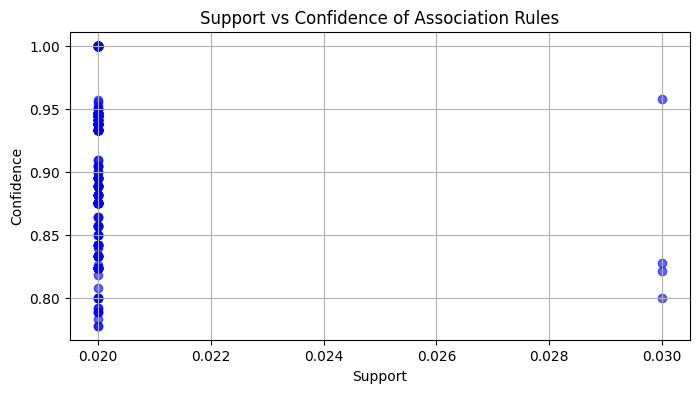

In [26]:
import matplotlib.pyplot as plt

# Access support and confidence from dictionary keys
supports = [rule['Support'] for rule in rules]
confidences = [rule['Confidence'] for rule in rules]

# Scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(supports, confidences, alpha=0.6, c='b')
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence of Association Rules")
plt.grid(True)
plt.show()

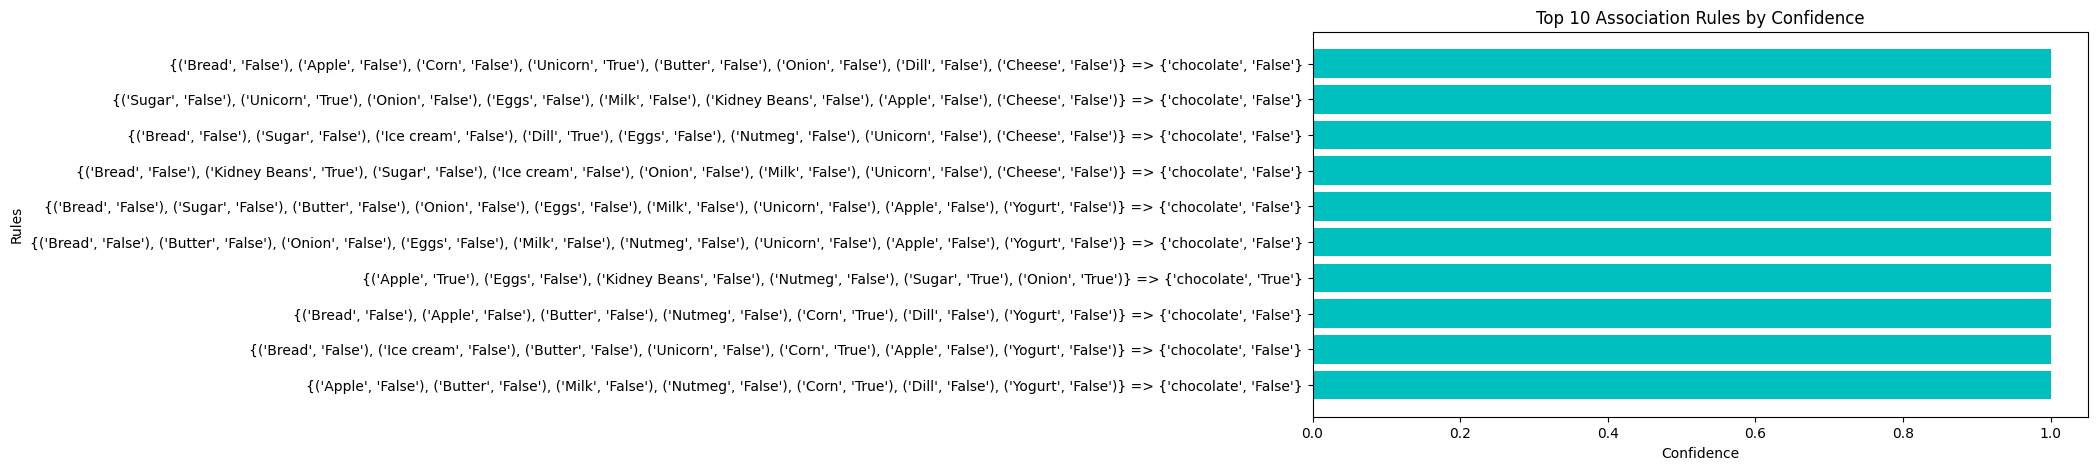

In [27]:
import pandas as pd

# Create a DataFrame for rules, Accessing values using dictionary keys
rules_df = pd.DataFrame({
    "Antecedent": [str(rule['Antecedent']) for rule in rules],
    "Consequent": [str(rule['Consequent']) for rule in rules],
    "Support": [rule['Support'] for rule in rules],
    "Confidence": [rule['Confidence'] for rule in rules]
})

# Sort by confidence and select top 10
top_rules = rules_df.sort_values(by="Confidence", ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10,5))
plt.barh(top_rules["Antecedent"] + " => " + top_rules["Consequent"], top_rules["Confidence"], color='c')
plt.xlabel("Confidence")
plt.ylabel("Rules")
plt.title("Top 10 Association Rules by Confidence")
plt.gca().invert_yaxis()
plt.show()